In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=53a982d08f9754613a4653cb69cc1a81


In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1             
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 2 of Set 1 | goedereede
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | sambava
Processing Record 6 of Set 1 | winslow
Processing Record 7 of Set 1 | zaysan
Processing Record 8 of Set 1 | berdigestyakh
Processing Record 9 of Set 1 | crotone
Processing Record 10 of Set 1 | saleaula
City not found. Skipping...
Processing Record 11 of Set 1 | muyezerskiy
Processing Record 12 of Set 1 | iwanai
Processing Record 13 of Set 1 | kruisfontein
Processing Record 14 of Set 1 | leningradskiy
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | karaul
City not found. Skipping...
Processing Record 20 of Set 1 | shubarshi
Processing Record 21 of Set 1 | soe
Processing Record 22 of Set 1 | ancud
Processing Record 23 o

Processing Record 43 of Set 4 | poum
Processing Record 44 of Set 4 | warrnambool
Processing Record 45 of Set 4 | thinadhoo
Processing Record 46 of Set 4 | faya
Processing Record 47 of Set 4 | saskylakh
Processing Record 48 of Set 4 | hithadhoo
Processing Record 49 of Set 4 | poddorye
Processing Record 50 of Set 4 | vostok
Processing Record 1 of Set 5 | haines junction
Processing Record 2 of Set 5 | hamilton
Processing Record 3 of Set 5 | srednekolymsk
Processing Record 4 of Set 5 | zharkent
Processing Record 5 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 5 | mandalgovi
Processing Record 7 of Set 5 | princeton
Processing Record 8 of Set 5 | ulladulla
Processing Record 9 of Set 5 | kavieng
Processing Record 10 of Set 5 | college
Processing Record 11 of Set 5 | fortuna
Processing Record 12 of Set 5 | clyde river
Processing Record 13 of Set 5 | mutsamudu
City not found. Skipping...
Processing Record 14 of Set 5 | tornio
Processing Record 15 of Set 5 | ulaga

Processing Record 31 of Set 8 | ulaanbaatar
Processing Record 32 of Set 8 | tiarei
Processing Record 33 of Set 8 | marinette
Processing Record 34 of Set 8 | belyy yar
Processing Record 35 of Set 8 | aleksandrovskiy zavod
Processing Record 36 of Set 8 | herne bay
Processing Record 37 of Set 8 | dingle
Processing Record 38 of Set 8 | san carlos de bariloche
Processing Record 39 of Set 8 | chagda
City not found. Skipping...
Processing Record 40 of Set 8 | ambilobe
Processing Record 41 of Set 8 | grindavik
Processing Record 42 of Set 8 | whitehorse
Processing Record 43 of Set 8 | mporokoso
Processing Record 44 of Set 8 | andenes
Processing Record 45 of Set 8 | jinxiang
Processing Record 46 of Set 8 | novobirilyussy
Processing Record 47 of Set 8 | the valley
Processing Record 48 of Set 8 | nyurba
Processing Record 49 of Set 8 | carndonagh
Processing Record 50 of Set 8 | panguna
Processing Record 1 of Set 9 | presidencia roque saenz pena
Processing Record 2 of Set 9 | oildale
Processing Reco

Processing Record 14 of Set 12 | bjornevatn
Processing Record 15 of Set 12 | kloulklubed
Processing Record 16 of Set 12 | buraydah
Processing Record 17 of Set 12 | neuquen
Processing Record 18 of Set 12 | waddan
Processing Record 19 of Set 12 | florianopolis
Processing Record 20 of Set 12 | cagliliog
Processing Record 21 of Set 12 | maningrida
Processing Record 22 of Set 12 | sawtell
Processing Record 23 of Set 12 | barentsburg
City not found. Skipping...
Processing Record 24 of Set 12 | wanning
Processing Record 25 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 26 of Set 12 | tulsipur
Processing Record 27 of Set 12 | kamskiye polyany
Processing Record 28 of Set 12 | mehriz
Processing Record 29 of Set 12 | hay river
Processing Record 30 of Set 12 | dicabisagan
Processing Record 31 of Set 12 | senneterre
Processing Record 32 of Set 12 | seddon
Processing Record 33 of Set 12 | belle fourche
Processing Record 34 of Set 12 | kushmurun
Processing Record 35 of Set 12 |

In [13]:
#check if more than 500 
len(city_data)

581

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Goedereede,51.82,3.98,61.00,81,0,6.87,NL,2020-09-01 21:30:03
1,Puerto Ayora,-0.74,-90.35,77.00,53,40,19.46,EC,2020-09-01 21:26:22
2,Bluff,-46.60,168.33,43.66,68,51,9.35,NZ,2020-09-01 21:30:04
3,Sambava,-14.27,50.17,68.23,87,79,10.33,MG,2020-09-01 21:30:05
4,Winslow,35.02,-110.70,91.40,16,40,23.04,US,2020-09-01 21:30:05
5,Zaysan,47.47,84.87,65.79,28,0,5.84,KZ,2020-09-01 21:30:06
6,Berdigestyakh,62.10,126.70,49.12,86,18,2.77,RU,2020-09-01 21:30:07
7,Crotone,39.09,17.12,73.31,66,3,7.31,IT,2020-09-01 21:30:07
8,Muyezerskiy,63.93,31.65,46.74,77,32,3.40,RU,2020-09-01 21:30:08
9,Iwanai,42.97,140.51,66.85,79,34,9.80,JP,2020-09-01 21:30:09


In [39]:
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Goedereede,NL,2020-09-01 21:30:03,51.82,3.98,61.00,81,0,6.87
1,Puerto Ayora,EC,2020-09-01 21:26:22,-0.74,-90.35,77.00,53,40,19.46
2,Bluff,NZ,2020-09-01 21:30:04,-46.60,168.33,43.66,68,51,9.35
3,Sambava,MG,2020-09-01 21:30:05,-14.27,50.17,68.23,87,79,10.33
4,Winslow,US,2020-09-01 21:30:05,35.02,-110.70,91.40,16,40,23.04
5,Zaysan,KZ,2020-09-01 21:30:06,47.47,84.87,65.79,28,0,5.84
6,Berdigestyakh,RU,2020-09-01 21:30:07,62.10,126.70,49.12,86,18,2.77
7,Crotone,IT,2020-09-01 21:30:07,39.09,17.12,73.31,66,3,7.31
8,Muyezerskiy,RU,2020-09-01 21:30:08,63.93,31.65,46.74,77,32,3.40
9,Iwanai,JP,2020-09-01 21:30:09,42.97,140.51,66.85,79,34,9.80


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1598996005.967299

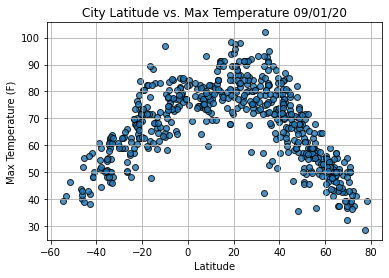

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

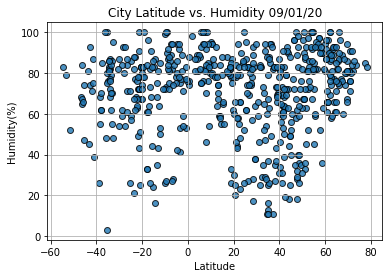

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

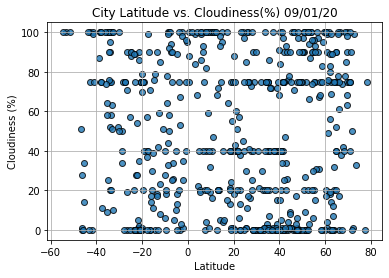

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

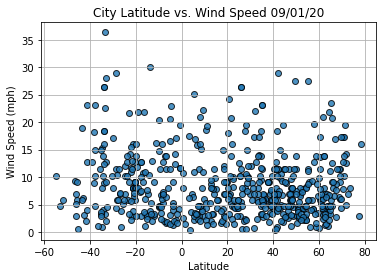

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [66]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [36]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Country                        CL
Date          2020-09-01 21:30:11
Lat                        -53.15
Lng                        -70.92
Max Temp                       41
Humidity                       79
Cloudiness                    100
Wind Speed                    4.7
Name: 13, dtype: object

In [40]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4       True
       ...  
576    False
577     True
578    False
579     True
580    False
Name: Lat, Length: 581, dtype: bool

In [41]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Goedereede,NL,2020-09-01 21:30:03,51.82,3.98,61.00,81,0,6.87
4,Winslow,US,2020-09-01 21:30:05,35.02,-110.70,91.40,16,40,23.04
5,Zaysan,KZ,2020-09-01 21:30:06,47.47,84.87,65.79,28,0,5.84
6,Berdigestyakh,RU,2020-09-01 21:30:07,62.10,126.70,49.12,86,18,2.77
7,Crotone,IT,2020-09-01 21:30:07,39.09,17.12,73.31,66,3,7.31
...,...,...,...,...,...,...,...,...,...
571,Jishou,CN,2020-09-01 21:33:23,28.32,109.72,72.09,85,0,0.49
572,Altamont,US,2020-09-01 21:33:23,42.21,-121.74,87.01,19,1,4.45
573,Tupik,RU,2020-09-01 21:33:23,54.43,119.93,49.64,86,96,4.83
577,Hunsur,IN,2020-09-01 21:33:25,12.31,76.29,69.24,93,100,5.28


In [73]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [56]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

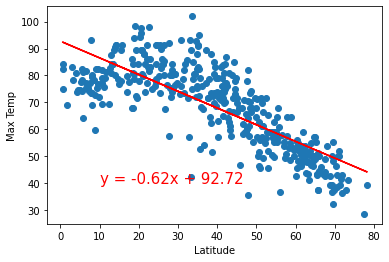

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for Maximum Temperature', 'Max Temp',(10,40))

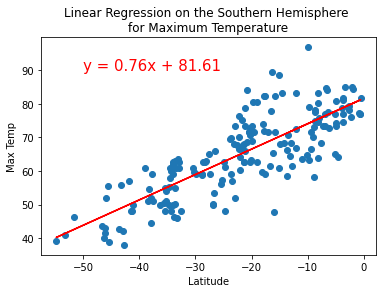

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n"
                        "for Maximum Temperature", "Max Temp",(-50,90))

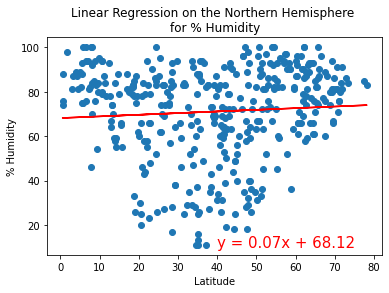

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(40,10))

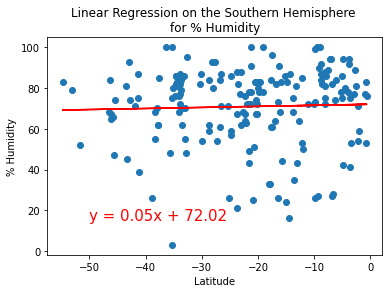

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                    'for % Humidity', '% Humidity',(-50,15))

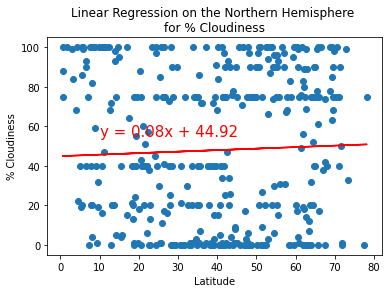

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for % Cloudiness', '% Cloudiness',(10,55))

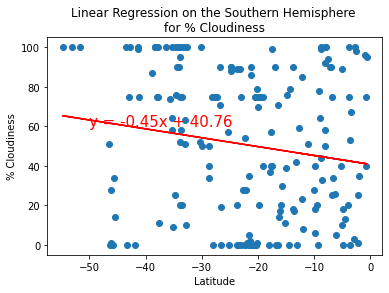

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-50,60))

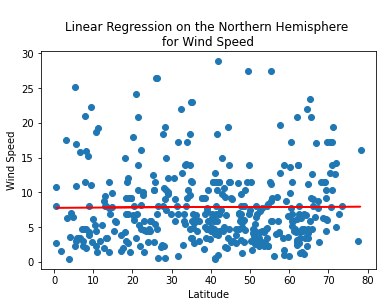

In [88]:
 # Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(40,35))

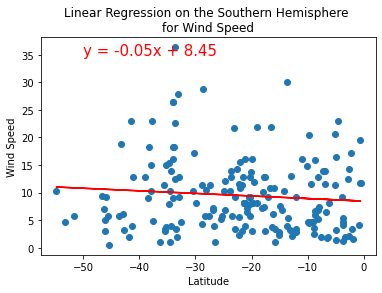

In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-50,35))